In [2]:
# !pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-py3-none-any.whl size=16035 sha256=7414161765336781025b5a441e898214572efbe7b7463f17e342887f203d3d45
  Stored in directory: /root/.cache/pip/wheels/f6/09/44/bec839054285e5cee64da8d7696e462f7dad0787fdde0a358c
Successfully built efficientnet-pytorch
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [3]:
import torch
import torch
import torch
from selfsupervisedlearning import augdataset
from selfsupervisedlearning import loss, train_utils, models
from selfsupervisedlearning import utils
import pandas as pd

### EfficientNet Model

In [4]:
# function to the features from images 
# model = models.EfficientNetModelMLP(features_dim=1024, v='b2', mlp_dim=1024)
# model = models.EfficientNetModel(features_dim=256, v='b2', mlp_dim=2048)
# model = models.EfficientNetModel(features_dim=128, v='b1', mlp_dim=2048)
model = models.ResnetMLP(features_dim=1024, v='18', mlp_dim=1024)
model.cuda()
model.load_state_dict(torch.load('models/modelv26_resnetmlp_jikeikai.pt')['model'])
# model.load_state_dict(torch.load('models/modelv9_efficientnetb1_alldata.pt')['model'])
# model.load_state_dict(torch.load('models/modelvv8_resnet50_alldata.pt')['model'])

<All keys matched successfully>

In [5]:
# import pickle
# df_fp = pickle.load(open('./data/unannotated_fp_v5_wpredictions.pic', 'rb'))


# df_fp.shape

# df_fp_sampled = df_fp[df_fp.fp.str.contains('_0.png') & df_fp.fp.str.contains('hiraka')].sample(200000)

# df_fp_sampled.shape
# %%time
# fps, features = utils.get_features(model, [
# #      '/mnt/UrineSediment/CNN_img/hiraka_hosp/**/*_0.*',
# ] + df_fp_sampled.fp.values.tolist() , batch_size=200)

In [6]:
df_fps = pd.read_csv("train-test-split/data/fp_to_be_clustered_UR211.csv")
# df_fps = pd.read_csv("train-test-split/data/test_fp_v3.csv")
fps = df_fps.sample(frac=1.0).fp.values.tolist()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
len(fps)

1119968

In [8]:
%%time
fps, features = utils.get_features(model, fps , batch_size=1000)

Number of Images:  1119968
Compose(
    Resize(size=(150, 150), interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])
)
CPU times: user 2min 34s, sys: 2min 2s, total: 4min 37s
Wall time: 6min 47s


In [9]:
df_fps_features = pd.DataFrame(zip(fps, features), columns=['fp', 'features'])

In [10]:
df_fps_features.head(2)

fp  \
0  /mnt/UrineSediment/CNN_img/osaka_cu_2019/20190...   
1  /mnt/UrineSediment/CNN_img/kyoto_mitsu_no7_201...   

                                            features  
0  [-0.0011164008, 0.020378394, -0.0038760155, -0...  
1  [-0.0034264957, 0.071865655, 0.06663804, -0.04...

In [11]:
# import pandas as pd
# df = pd.read_csv('data/area_fp.csv')
# fps = df[df.area == 'lt_6400']['fp'].values
# fps, features = utils.get_features(model, fps, batch_size=256)

In [12]:
len(fps)

1119968

In [13]:
%%time
# !yes | pip uninstall enum34
# !pip install hdbscan

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 8.11 µs


In [14]:
%%time
# cluster based on features
# import hdbscan

# from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, AffinityPropagation
# import numpy as np
# from sklearn.mixture import GaussianMixture 

# clustering = KMeans(n_clusters=2400, random_state=0, ).fit(features)
# # gmm = GaussianMixture(n_components=400).fit(features)
# # labels = gmm.predict(features)
# # clustering = OPTICS(metric='euclidean', xi=0.0001, min_samples=5).fit(features)
# # clustering = AffinityPropagation(damping=0.52, verbose=True, max_iter=200).fit(features)
# # clustering = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, alpha=1.3).fit(features)

# labels = clustering.labels_
n_samples_per_cluster = 25000
labels = [x//n_samples_per_cluster for x in range(len(fps))]

CPU times: user 85.9 ms, sys: 9.45 ms, total: 95.4 ms
Wall time: 94 ms


In [15]:
# number of points/images
len(labels)

1119968

In [16]:
# the distribution of labels
from collections import Counter
Counter(labels), len(set(labels)), len(labels)

(Counter({0: 25000,
          1: 25000,
          2: 25000,
          3: 25000,
          4: 25000,
          5: 25000,
          6: 25000,
          7: 25000,
          8: 25000,
          9: 25000,
          10: 25000,
          11: 25000,
          12: 25000,
          13: 25000,
          14: 25000,
          15: 25000,
          16: 25000,
          17: 25000,
          18: 25000,
          19: 25000,
          20: 25000,
          21: 25000,
          22: 25000,
          23: 25000,
          24: 25000,
          25: 25000,
          26: 25000,
          27: 25000,
          28: 25000,
          29: 25000,
          30: 25000,
          31: 25000,
          32: 25000,
          33: 25000,
          34: 25000,
          35: 25000,
          36: 25000,
          37: 25000,
          38: 25000,
          39: 25000,
          40: 25000,
          41: 25000,
          42: 25000,
          43: 25000,
          44: 19968}),
 45,
 1119968)

In [17]:
# # the distribution of labels
# from collections import Counter
# Counter(labels), len(set(labels))

In [18]:
# zip labels with filepaths of images
preds = list(zip(labels, fps))

#### sub clusters

In [19]:
# features[0]

In [ ]:
%%time
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, AffinityPropagation
import numpy as np
from sklearn.mixture import GaussianMixture 

df_preds = pd.DataFrame(list(zip(labels, fps, features)), columns=['label', 'fp', 'features'])

clusters = df_preds.label.unique()
preds = []
for cluster in clusters:
    
    df_sub = df_preds[df_preds.label == cluster]
    print('sub clusters for: ', cluster, ' points in cluster: ', df_sub.shape)
#     sub_clustering = AffinityPropagation(damping=0.55, verbose=True, max_iter=1000).fit(np.vstack(df_sub.features.values))
    sub_clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=1.0).fit(np.vstack(df_sub.features.values))
    sub_labels = sub_clustering.labels_
    preds.extend(list(zip(df_sub.label, df_sub.fp, sub_labels)))
    print('number of sub clusters', len(list(set(sub_labels))))


sub clusters for:  0  points in cluster:  (25000, 3)
number of sub clusters 7635
sub clusters for:  1  points in cluster:  (25000, 3)
number of sub clusters 7588
sub clusters for:  2  points in cluster:  (25000, 3)
number of sub clusters 7568
sub clusters for:  3  points in cluster:  (25000, 3)


In [ ]:
preds_df = pd.DataFrame(preds, columns=['cluster', 'fp', 'subcluster'])

In [ ]:
preds_df['c_sc'] = preds_df['cluster'].astype(str) + '_' + preds_df['subcluster'].astype(str)

In [ ]:
preds_df.head()

In [ ]:
uniformly_sampled_df = preds_df.groupby("c_sc").apply(lambda x: x if x.shape[0]==1 else x.sample(n=2, replace=False)).drop_duplicates()
uniformly_sampled_df.c_sc.value_counts()

In [ ]:
uniformly_sampled_df.shape

In [ ]:
uniformly_sampled_df_m = pd.merge(df_fps_features, uniformly_sampled_df, on='fp', how='inner').reset_index(drop=True)
uniformly_sampled_df_m.shape

In [28]:
uniformly_sampled_df_m.shape

(660105, 5)

In [30]:
import pickle
pickle.dump(uniformly_sampled_df_m, open('data/uniform_sample_UR211_stage1.pic', 'wb'))

#### 2nd stage

In [35]:
fps = uniformly_sampled_df_m.fp.values
features = uniformly_sampled_df_m.features.values
n_samples_per_cluster = 25000
labels = [x//n_samples_per_cluster for x in range(len(fps))]
len(labels)

660105

In [36]:
%%time
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, AffinityPropagation
import numpy as np
from sklearn.mixture import GaussianMixture 

df_preds = pd.DataFrame(list(zip(labels, fps, features)), columns=['label', 'fp', 'features'])

clusters = df_preds.label.unique()
preds = []
for cluster in clusters:
    
    df_sub = df_preds[df_preds.label == cluster]
    print('sub clusters for: ', cluster, ' points in cluster: ', df_sub.shape)
#     sub_clustering = AffinityPropagation(damping=0.55, verbose=True, max_iter=1000).fit(np.vstack(df_sub.features.values))
    sub_clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=1.0).fit(np.vstack(df_sub.features.values))
    sub_labels = sub_clustering.labels_
    preds.extend(list(zip(df_sub.label, df_sub.fp, sub_labels)))
    print('number of sub clusters', len(list(set(sub_labels))))


sub clusters for:  0  points in cluster:  (25000, 3)
number of sub clusters 8662
sub clusters for:  1  points in cluster:  (25000, 3)
number of sub clusters 8625
sub clusters for:  2  points in cluster:  (25000, 3)
number of sub clusters 8706
sub clusters for:  3  points in cluster:  (25000, 3)
number of sub clusters 8695
sub clusters for:  4  points in cluster:  (25000, 3)
number of sub clusters 8622
sub clusters for:  5  points in cluster:  (25000, 3)
number of sub clusters 8669
sub clusters for:  6  points in cluster:  (25000, 3)
number of sub clusters 8655
sub clusters for:  7  points in cluster:  (25000, 3)
number of sub clusters 8641
sub clusters for:  8  points in cluster:  (25000, 3)
number of sub clusters 8644
sub clusters for:  9  points in cluster:  (25000, 3)
number of sub clusters 8645
sub clusters for:  10  points in cluster:  (25000, 3)
number of sub clusters 8691
sub clusters for:  11  points in cluster:  (25000, 3)
number of sub clusters 8640
sub clusters for:  12  poi

In [37]:
preds_df = pd.DataFrame(preds, columns=['cluster', 'fp', 'subcluster'])

In [38]:
preds_df['c_sc'] = preds_df['cluster'].astype(str) + '_' + preds_df['subcluster'].astype(str)

In [39]:
preds_df.head()

cluster                                                 fp  subcluster  \
0        0  /mnt/UrineSediment/CNN_img/kyoto_mitsu_no7_201...        4489   
1        0  /mnt/UrineSediment/CNN_img/image_data_48_categ...         318   
2        0  /mnt/UrineSediment/CNN_img/kyoto_mitsu_no7_201...        4680   
3        0  /mnt/UrineSediment/CNN_img/kyoto_mitsu_no7_201...        7009   
4        0  /mnt/UrineSediment/CNN_img/kyoto_mitsu_no7_201...        1304   

     c_sc  
0  0_4489  
1   0_318  
2  0_4680  
3  0_7009  
4  0_1304

In [40]:
uniformly_sampled_df = preds_df.groupby("c_sc").apply(lambda x: x if x.shape[0]==1 else x.sample(n=2, replace=False)).drop_duplicates()
uniformly_sampled_df.c_sc.value_counts()

5_7047     2
2_5101     2
22_663     2
23_3085    2
25_8571    2
          ..
22_6610    1
26_3411    1
12_6382    1
19_7464    1
6_8018     1
Name: c_sc, Length: 229419, dtype: int64

In [41]:
uniformly_sampled_df.shape

(447193, 4)

In [42]:
uniformly_sampled_df_m = pd.merge(df_fps_features, uniformly_sampled_df, on='fp', how='inner').reset_index(drop=True)
uniformly_sampled_df_m.shape

(447193, 5)

In [43]:
uniformly_sampled_df_m.shape

(447193, 5)

In [44]:
import pickle
pickle.dump(uniformly_sampled_df_m, open('data/uniform_sample_UR211_stage2.pic', 'wb'))

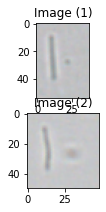

In [50]:
from skimage import io
images = [io.imread(fp) for cluster, fp in uniformly_sampled_df_m[['c_sc', 'fp']].values if cluster == '5_7047'][:10]

utils.show_images(images[:10])

### Stage 3 

In [51]:
uniformly_sampled_df_m = uniformly_sampled_df_m.sample(frac=1.0)

In [52]:
fps = uniformly_sampled_df_m.fp.values
features = uniformly_sampled_df_m.features.values
n_samples_per_cluster = 100000
labels = [x//n_samples_per_cluster for x in range(len(fps))]
len(labels)

447193

In [ ]:
%%time
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, AffinityPropagation
import numpy as np
from sklearn.mixture import GaussianMixture 

df_preds = pd.DataFrame(list(zip(labels, fps, features)), columns=['label', 'fp', 'features'])

clusters = df_preds.label.unique()
preds = []
for cluster in clusters:
    
    df_sub = df_preds[df_preds.label == cluster]
    print('sub clusters for: ', cluster, ' points in cluster: ', df_sub.shape)
#     sub_clustering = AffinityPropagation(damping=0.55, verbose=True, max_iter=1000).fit(np.vstack(df_sub.features.values))
    sub_clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=1.0).fit(np.vstack(df_sub.features.values))
    sub_labels = sub_clustering.labels_
    preds.extend(list(zip(df_sub.label, df_sub.fp, sub_labels)))
    print('number of susb clusters', len(list(set(sub_labels))))


sub clusters for:  0  points in cluster:  (100000, 3)
number of sub clusters 28860
sub clusters for:  1  points in cluster:  (100000, 3)


In [ ]:
preds_df = pd.DataFrame(preds, columns=['cluster', 'fp', 'subcluster'])

In [ ]:
preds_df['c_sc'] = preds_df['cluster'].astype(str) + '_' + preds_df['subcluster'].astype(str)

In [ ]:
preds_df.head()

In [ ]:
uniformly_sampled_df = preds_df.groupby("c_sc").apply(lambda x: x if x.shape[0]==1 else x.sample(n=2, replace=False)).drop_duplicates()
uniformly_sampled_df.c_sc.value_counts()

In [ ]:
uniformly_sampled_df.shape

In [ ]:
uniformly_sampled_df_m = pd.merge(df_fps_features, uniformly_sampled_df, on='fp', how='inner').reset_index(drop=True)
uniformly_sampled_df_m.shape

In [ ]:
uniformly_sampled_df_m.shape

In [ ]:
import pickle
pickle.dump(uniformly_sampled_df_m, open('data/uniform_sample_UR211_stage3.pic', 'wb'))

#### stage 4

In [46]:
# cluster based on features
# import hdbscan

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, AffinityPropagation
import numpy as np
from sklearn.mixture import GaussianMixture 

# clustering = KMeans(n_clusters=2400, random_state=0, ).fit(np.vstack(uniformly_sampled_df_m.features))
clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=1.0).fit(np.vstack(uniformly_sampled_df_m.features))
# gmm = GaussianMixture(n_components=400).fit(features)
# labels = gmm.predict(features)
# clustering = OPTICS(metric='euclidean', xi=0.0001, min_samples=5).fit(features)
# clustering = AffinityPropagation(damping=0.52, verbose=True, max_iter=200).fit(features)
# clustering = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, alpha=1.3).fit(features)

labels = clustering.labels_
uniformly_sampled_df_m['3stage_cluster'] = labels

MemoryError: Unable to allocate 745. GiB for an array with shape (99990566028,) and data type float64

In [92]:
from collections import Counter
Counter(labels), len(set(labels)), len(labels)

(Counter({2739: 3,
          1379: 3,
          4451: 2,
          3064: 3,
          1762: 2,
          2804: 4,
          2921: 4,
          2419: 3,
          3537: 3,
          2659: 4,
          3496: 6,
          3638: 2,
          4418: 3,
          1935: 4,
          697: 3,
          1147: 3,
          1215: 3,
          2983: 2,
          2725: 2,
          3081: 6,
          4951: 1,
          4094: 2,
          2913: 2,
          1850: 2,
          2661: 4,
          2514: 3,
          1782: 9,
          1326: 5,
          2123: 12,
          926: 4,
          3715: 3,
          1269: 4,
          2104: 7,
          4801: 1,
          1473: 2,
          2065: 2,
          4768: 1,
          2289: 4,
          168: 10,
          267: 5,
          1241: 4,
          3794: 2,
          4722: 3,
          4015: 3,
          2254: 4,
          1015: 2,
          3798: 4,
          2805: 8,
          2779: 1,
          2328: 2,
          3653: 2,
          2567: 3,
          524:

In [ ]:
# from skimage import io
# images = [io.imread(fp) for cluster, fp in zip(un) if cluster == '0_103'][:10]

# utils.show_images(images[:10])

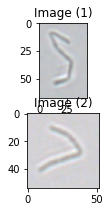

In [95]:
from skimage import io
images = [io.imread(fp) for cluster, fp in uniformly_sampled_df_m[['2stage_cluster', 'fp']].values if cluster == 3794][:10]

utils.show_images(images[:10])

In [ ]:
# import pickle 
# # pickle.dump(preds, open('data/cluster_preds_modelv20_allhiraka.pic', 'wb'))
# pickle.dump(preds, open('data/cluster_preds_modelv26_UR211_c2400.pic', 'wb'))

### restart memory to clear memory

In [ ]:
import os
os._exit(0)


In [17]:

import shutil, os, time
# output_dir = f'../../data_imgs/selfsupervisedclustersconfusingdatamodelv9ENb1k200'
output_dir = f'../../data_imgs/selfsupervisedclusterssimsaimkmean200confdatamodelv12ENb2_subclusters'

clusters_to_write = preds

try:
    os.mkdir(output_dir)
except Exception as e:
    print(e)
    shutil.rmtree(output_dir)
    time.sleep(5)
    os.mkdir(output_dir)
    

if len(clusters_to_write[0]) == 2:  
    print('no subcluster data')
    for cluster in list(set([cluster for cluster, _ in clusters_to_write])):

        os.mkdir(os.path.join(output_dir, str(cluster)))
    
    for cluster, fp in clusters_to_write:
        cluster_dir = os.path.join(output_dir, str(cluster))
        filename = os.path.basename(fp)
        dest_fp = os.path.join(cluster_dir, f'{filename}')
        shutil.copy(fp, dest_fp)
else:
    print('subcluster data found')
    for cluster in list(set([cluster for cluster, _, _ in clusters_to_write])):
        os.mkdir(os.path.join(output_dir, str(cluster)))
        
    
    for cluster, fp, sub_cluster in clusters_to_write:
        cluster_dir = os.path.join(output_dir, str(cluster))
        filename = os.path.basename(fp)
        dest_fp = os.path.join(cluster_dir, f'{sub_cluster}#{filename}')
        shutil.copy(fp, dest_fp)
    

subcluster data found


In [18]:
!rm {os.path.abspath(os.path.dirname(output_dir))}/{os.path.basename(output_dir)}.7z

rm: cannot remove '/home/devi_prasad/UrineSedimentation/data_imgs/selfsupervisedclusterssimsaimkmean200confdatamodelv12ENb2_subclusters.7z': No such file or directory


In [19]:
!7z a {os.path.abspath(os.path.dirname(output_dir))}/{os.path.basename(output_dir)}.7z {output_dir} 


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,40 CPUs Intel(R) Xeon(R) CPU E5-2698 v4 @ 2.20GHz (406F1),ASM,AES-NI)

Scanning the drive:
  0M Scan  ../../data_imgs                          201 folders, 4356 files, 92334163 bytes (89 MiB)

Creating archive: /home/devi_prasad/UrineSedimentation/data_imgs/selfsupervisedclusterssimsaimkmean200confdatamodelv12ENb2_subclusters.7z

Items to compress: 4557

      0% 2590 + selfsupervisedclusterssimsaimk . 144128_1_0007_UNCL_00162_0.bm                                                                            1% 4356 + selfsupervisedclusterssimsaimk . 121833_1_0004_UNCL_00954_0.bm                                                                            3% 4356 + selfsupervisedclusterssimsaimk . 121833_1_0004_UNCL_00954_0.bm                                                                            5% 4356 + selfsupervisedclusterssimsaimk . 121833_1_0004_U

In [18]:
torch.cuda.empty_cache()
del model

In [17]:
! yes| apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip
Suggested packages:
  p7zip-rar
The following NEW packages will be installed:
  p7zip p7zip-full
0 upgraded, 2 newly installed, 0 to remove and 135 not upgraded.
Need to get 1522 kB of archives.
After this operation, 5755 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 p7zip amd64 16.02+dfsg-6 [358 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 p7zip-full amd64 16.02+dfsg-6 [1164 kB]
Fetched 1522 kB in 3s (479 kB/s)      
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
Selecting previously unselected package p7zip.
(Reading database ... 73841 files and d

In [16]:
!sudo apt-get update

Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 Packages [39.4 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:4 http://archive.ubuntu.com/ubuntu bionic InRelease [242 kB]               
Get:5 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [211 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:7 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [15.4 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1745 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:10 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 Packages [186 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1352 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic/restricted amd64 Pack